# INTRODUCTION TO THE PROBLEM AND DATASET

## PROBLEM STATEMENT

> Over the years, inflation in India has averaged around 6%, yet many people still prefer traditional investment options like `Fixed Deposits (FDs) and Recurring Deposits (RDs), which often yield returns lower than inflation`. A common perception among Indians is that capital markets and investments are complex, requiring advanced financial knowledge. As a result, many `hesitate to explore stock markets and other investment opportunities, limiting their financial growth`.  

> To address this gap, a tech-driven platform was launched in 2020 with the goal of `simplifying finance and making investment decisions more accessible`. Using `artificial intelligence (AI) and machine learning (ML)`, the platform provides `smart news discovery, real-time stock insights, and a social community for discussions`. By delivering curated financial information in an easy-to-understand format, it empowers users—especially first-time investors—to make informed decisions with minimal effort.

## OBJECTIVE OF THE PROJECT

> The goal of this project is to classify news articles into categories like `politics, technology, sports, business, and entertainment` using `Natural Language Processing (NLP) and Machine Learning (ML)`. The project involves text preprocessing, feature extraction, and training multiple classification models.

> At least three different models, including `Naïve Bayes, Decision Tree, and Random Forest`, will be implemented and compared to determine the best-performing approach.

## IMPORT ALL THE REQUIRED LIBRARIES

In [67]:
# To ignore all warnings
import warnings

# for creating random numbers
import random

# for string operations
import string

# for permutations and combinations
import itertools

# for proper display of dataframes and images
from IPython.display import display
from PIL import Image

# For reading & manipulating the data
import pandas as pd
import numpy as np

# For visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pprint import pprint
from sklearn.manifold import TSNE

# To use Regular Expressions
import re

# To display progress bars
from tqdm.notebook import tqdm

# To use Natural Language Processing
import nltk
import spacy

# For tokenization
from nltk.tokenize import word_tokenize,sent_tokenize,TweetTokenizer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')

# to expand contractions
import contractions

# To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# for stemming
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer
# For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform train-test split
from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

# Named Entity Recognition
from spacy import displacy
 
warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_d

## IMPORT DATASET

In [2]:
data = pd.read_csv(r"C:\Users\saina\Desktop\DS_ML_AI\Scaler\Module_21_NLP\Case_studies\other\news-data.csv")

In [3]:
data.sample(10,random_state=42)

,Category,Article
414,Politics,brown and blair face new rift claims for the u...
420,Business,small firms hit by rising costs rising fuel ...
1644,Entertainment,spirit awards hail sideways the comedy sideway...
416,Technology,microsoft releases patches microsoft has warne...
1232,Sports,arsenal through on penalties arsenal win 4-2 o...
1544,Business,jobs go at oracle after takeover oracle has an...
1748,Business,id theft surge hits us consumers almost a quar...
1264,Sports,poll explains free-kick decision referee graha...
629,Sports,parmar ruled out of davis cup tie a knee injur...
1043,Technology,video phones act as dating tools technologies ...


# EDA

## TOTAL NUMBER OF NEWS ARTICLES 

In [4]:
print("No. of news articles: {}".format(data.shape[0]))

No. of news articles: 2225


## EXPLORING THE LABELS

Labels in the dataset:  ['Sports', 'Business', 'Politics', 'Technology', 'Entertainment']
Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64


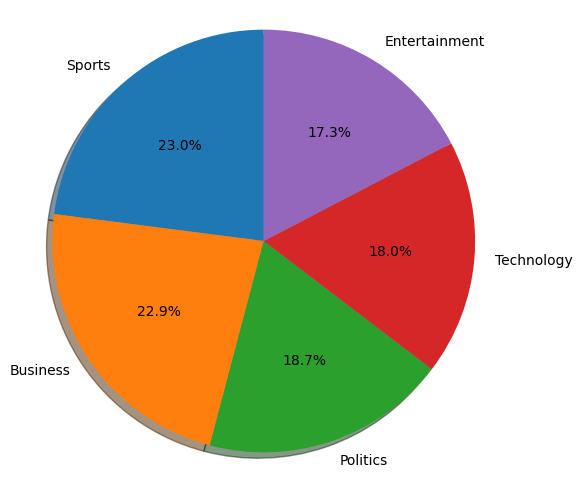

In [5]:
def pie_chart(dataframe):
    label_counts = dataframe.Category.value_counts()
    
    print('Labels in the dataset: ', label_counts.index.tolist())
    print(label_counts)

    labels = label_counts.index  # Corrected: Ensure labels match their counts
    sizes = label_counts.values  # Get counts directly
    
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')  # Keep the pie chart circular
    plt.show()

pie_chart(data)


## TRAIN TEST SPLIT

In [6]:
# Assuming 'data' is already loaded with the 'Category' column
# Split the dataset into features (X) and labels (y)
X = data['Article'].astype(str)
y = data['Category']

# Perform 80/20 split with stratification based on the 'Category' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the size of the training and testing datasets
print(f"Size of training dataset: {len(X_train)}")
print(f"Size of testing dataset: {len(X_test)}")


Size of training dataset: 1780
Size of testing dataset: 445


In [7]:
print('\nSports article sample:', X_train[y_train == 'Sports'].sample(1,random_state=42).values[0])
print('\nBusiness article sample:', X_train[y_train == 'Business'].sample(1,random_state=42).values[0])
print('\nPolitics article sample:', X_train[y_train == 'Politics'].sample(1,random_state=42).values[0])
print('\nTechnology article sample:', X_train[y_train == 'Technology'].sample(1,random_state=42).values[0])
print('\nEntertainment article sample:', X_train[y_train == 'Entertainment'].sample(1,random_state=42).values[0])


Sports article sample: ireland win eclipses refereeing  errors  the international rugby board may have to step in to stop frustrated coaches and players from publicly haranguing referees when things go belly-up.  it may have to go the whole way and have nfl-style video cameras all over the field  or slap the vociferous perpetrators over the knuckles. what the irb does not want is a football scenario where the verbal slanging matches often overshadow the game itself. sunday s explosive six nations clash at lansdowne road was a good example as ireland took another step towards their first grand slam since 1948. the game was as exciting as it comes  with a much-improved england side enraged at a few decisions that did not go their way. one can understand that frustration. there was no doubt that ireland had the rub of the green in their 19-13 victory  but the reaction from the england camp may not have endeared them to the sport s  blazers . referee jonathan kaplan was not perfect by any

## TOKENIZATION

### Word Tokenizer

In [8]:
# Split on spaces
article = X_train[12]
word = article.split() # space tokenizer
print('Using Split :',word)


Using Split : ['crude', 'oil', 'prices', 'back', 'above', '$50', 'cold', 'weather', 'across', 'parts', 'of', 'the', 'united', 'states', 'and', 'much', 'of', 'europe', 'has', 'pushed', 'us', 'crude', 'oil', 'prices', 'above', '$50', 'a', 'barrel', 'for', 'the', 'first', 'time', 'in', 'almost', 'three', 'months.', 'freezing', 'temperatures', 'and', 'heavy', 'snowfall', 'have', 'increased', 'demand', 'for', 'heating', 'fuel', 'in', 'the', 'us', 'where', 'stocks', 'are', 'low.', 'fresh', 'falls', 'in', 'the', 'value', 'of', 'the', 'dollar', 'helped', 'carry', 'prices', 'above', 'the', '$50', 'mark', 'for', 'the', 'first', 'time', 'since', 'november.', 'a', 'barrel', 'of', 'us', 'crude', 'oil', 'closed', 'up', '$2.80', 'to', '$51.15', 'in', 'new', 'york', 'on', 'tuesday.', 'opec', 'members', 'said', 'on', 'tuesday', 'that', 'it', 'saw', 'no', 'reason', 'to', 'cut', 'its', 'output.', 'although', 'below', 'last', 'year', 's', 'peak', 'of', '$55.67', 'a', 'barrel', 'which', 'was', 'reached', '

### Regular expression tokenizer

In [9]:
tokens = re.findall("[\w']+", article)
print('Using regexes :',tokens)

Using regexes : ['crude', 'oil', 'prices', 'back', 'above', '50', 'cold', 'weather', 'across', 'parts', 'of', 'the', 'united', 'states', 'and', 'much', 'of', 'europe', 'has', 'pushed', 'us', 'crude', 'oil', 'prices', 'above', '50', 'a', 'barrel', 'for', 'the', 'first', 'time', 'in', 'almost', 'three', 'months', 'freezing', 'temperatures', 'and', 'heavy', 'snowfall', 'have', 'increased', 'demand', 'for', 'heating', 'fuel', 'in', 'the', 'us', 'where', 'stocks', 'are', 'low', 'fresh', 'falls', 'in', 'the', 'value', 'of', 'the', 'dollar', 'helped', 'carry', 'prices', 'above', 'the', '50', 'mark', 'for', 'the', 'first', 'time', 'since', 'november', 'a', 'barrel', 'of', 'us', 'crude', 'oil', 'closed', 'up', '2', '80', 'to', '51', '15', 'in', 'new', 'york', 'on', 'tuesday', 'opec', 'members', 'said', 'on', 'tuesday', 'that', 'it', 'saw', 'no', 'reason', 'to', 'cut', 'its', 'output', 'although', 'below', 'last', 'year', 's', 'peak', 'of', '55', '67', 'a', 'barrel', 'which', 'was', 'reached', '

### NLTK Word Tokenize

In [10]:
words = word_tokenize(article)
print('Using NLTK :',words)

Using NLTK : ['crude', 'oil', 'prices', 'back', 'above', '$', '50', 'cold', 'weather', 'across', 'parts', 'of', 'the', 'united', 'states', 'and', 'much', 'of', 'europe', 'has', 'pushed', 'us', 'crude', 'oil', 'prices', 'above', '$', '50', 'a', 'barrel', 'for', 'the', 'first', 'time', 'in', 'almost', 'three', 'months', '.', 'freezing', 'temperatures', 'and', 'heavy', 'snowfall', 'have', 'increased', 'demand', 'for', 'heating', 'fuel', 'in', 'the', 'us', 'where', 'stocks', 'are', 'low', '.', 'fresh', 'falls', 'in', 'the', 'value', 'of', 'the', 'dollar', 'helped', 'carry', 'prices', 'above', 'the', '$', '50', 'mark', 'for', 'the', 'first', 'time', 'since', 'november', '.', 'a', 'barrel', 'of', 'us', 'crude', 'oil', 'closed', 'up', '$', '2.80', 'to', '$', '51.15', 'in', 'new', 'york', 'on', 'tuesday', '.', 'opec', 'members', 'said', 'on', 'tuesday', 'that', 'it', 'saw', 'no', 'reason', 'to', 'cut', 'its', 'output', '.', 'although', 'below', 'last', 'year', 's', 'peak', 'of', '$', '55.67', 

### Sentence Tokenize using split

In [11]:
# Splits at '.'
splits = article.split('. ')
print('Using Splits :',splits)

Using Splits : ['crude oil prices back above $50 cold weather across parts of the united states and much of europe has pushed us crude oil prices above $50 a barrel for the first time in almost three months', ' freezing temperatures and heavy snowfall have increased demand for heating fuel in the us  where stocks are low', 'fresh falls in the value of the dollar helped carry prices above the $50 mark for the first time since november', 'a barrel of us crude oil closed up $2.80 to $51.15 in new york on tuesday', 'opec members said on tuesday that it saw no reason to cut its output', ' although below last year s peak of $55.67 a barrel  which was reached in october  prices are now well above 2004 s average of $41.48', ' brent crude also rose in london trading  adding $1.89 to $48.62 at the close', 'much of western europe and the north east of america has been shivering under unseasonably low temperatures in recent days', 'the decline in the us dollar to a five-week low against the euro h

### Sentence Tokenize using regex

In [12]:
# Using Regular Expressions (RegEx)
sentence_splits = re.compile('[.!?] ').split(article)
print('Using regexes :',sentence_splits)

Using regexes : ['crude oil prices back above $50 cold weather across parts of the united states and much of europe has pushed us crude oil prices above $50 a barrel for the first time in almost three months', ' freezing temperatures and heavy snowfall have increased demand for heating fuel in the us  where stocks are low', 'fresh falls in the value of the dollar helped carry prices above the $50 mark for the first time since november', 'a barrel of us crude oil closed up $2.80 to $51.15 in new york on tuesday', 'opec members said on tuesday that it saw no reason to cut its output', ' although below last year s peak of $55.67 a barrel  which was reached in october  prices are now well above 2004 s average of $41.48', ' brent crude also rose in london trading  adding $1.89 to $48.62 at the close', 'much of western europe and the north east of america has been shivering under unseasonably low temperatures in recent days', 'the decline in the us dollar to a five-week low against the euro 

### NLTK sent_tokenize

In [13]:
# Using NLTK
from nltk.tokenize import sent_tokenize
sentence_splits = sent_tokenize(article)
print('Using NLTK :',sentence_splits)

Using NLTK : ['crude oil prices back above $50 cold weather across parts of the united states and much of europe has pushed us crude oil prices above $50 a barrel for the first time in almost three months.', 'freezing temperatures and heavy snowfall have increased demand for heating fuel in the us  where stocks are low.', 'fresh falls in the value of the dollar helped carry prices above the $50 mark for the first time since november.', 'a barrel of us crude oil closed up $2.80 to $51.15 in new york on tuesday.', 'opec members said on tuesday that it saw no reason to cut its output.', 'although below last year s peak of $55.67 a barrel  which was reached in october  prices are now well above 2004 s average of $41.48.', 'brent crude also rose in london trading  adding $1.89 to $48.62 at the close.', 'much of western europe and the north east of america has been shivering under unseasonably low temperatures in recent days.', 'the decline in the us dollar to a five-week low against the eur

### Tweet Tokenizer

In [14]:
# remove old style rearticle text "RT"
article2 = re.sub(r'^RT[\s]+', '', article)

# remove hyperlinks
article2 = re.sub(r'https?://[^\s\n\r]+', '', article2)

# remove hashtags
# only removing the hash # sign from the word
article2 = re.sub(r'#', '', article2)
print(article2)

crude oil prices back above $50 cold weather across parts of the united states and much of europe has pushed us crude oil prices above $50 a barrel for the first time in almost three months.  freezing temperatures and heavy snowfall have increased demand for heating fuel in the us  where stocks are low. fresh falls in the value of the dollar helped carry prices above the $50 mark for the first time since november. a barrel of us crude oil closed up $2.80 to $51.15 in new york on tuesday. opec members said on tuesday that it saw no reason to cut its output.  although below last year s peak of $55.67 a barrel  which was reached in october  prices are now well above 2004 s average of $41.48.  brent crude also rose in london trading  adding $1.89 to $48.62 at the close. much of western europe and the north east of america has been shivering under unseasonably low temperatures in recent days. the decline in the us dollar to a five-week low against the euro has also served to inflate prices.

In [15]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(article2)


print()
print('Tokenized string:')
print(tweet_tokens)


Tokenized string:
['crude', 'oil', 'prices', 'back', 'above', '$', '50', 'cold', 'weather', 'across', 'parts', 'of', 'the', 'united', 'states', 'and', 'much', 'of', 'europe', 'has', 'pushed', 'us', 'crude', 'oil', 'prices', 'above', '$', '50', 'a', 'barrel', 'for', 'the', 'first', 'time', 'in', 'almost', 'three', 'months', '.', 'freezing', 'temperatures', 'and', 'heavy', 'snowfall', 'have', 'increased', 'demand', 'for', 'heating', 'fuel', 'in', 'the', 'us', 'where', 'stocks', 'are', 'low', '.', 'fresh', 'falls', 'in', 'the', 'value', 'of', 'the', 'dollar', 'helped', 'carry', 'prices', 'above', 'the', '$', '50', 'mark', 'for', 'the', 'first', 'time', 'since', 'november', '.', 'a', 'barrel', 'of', 'us', 'crude', 'oil', 'closed', 'up', '$', '2.80', 'to', '$', '51.15', 'in', 'new', 'york', 'on', 'tuesday', '.', 'opec', 'members', 'said', 'on', 'tuesday', 'that', 'it', 'saw', 'no', 'reason', 'to', 'cut', 'its', 'output', '.', 'although', 'below', 'last', 'year', 's', 'peak', 'of', '$', '55

### NLTK stopwords

In [16]:
# Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

### Remove stopwords and punctuation

In [17]:
tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)

removed stop words and punctuation:
['crude', 'oil', 'prices', 'back', '50', 'cold', 'weather', 'across', 'parts', 'united', 'states', 'much', 'europe', 'pushed', 'us', 'crude', 'oil', 'prices', '50', 'barrel', 'first', 'time', 'almost', 'three', 'months', 'freezing', 'temperatures', 'heavy', 'snowfall', 'increased', 'demand', 'heating', 'fuel', 'us', 'stocks', 'low', 'fresh', 'falls', 'value', 'dollar', 'helped', 'carry', 'prices', '50', 'mark', 'first', 'time', 'since', 'november', 'barrel', 'us', 'crude', 'oil', 'closed', '2.80', '51.15', 'new', 'york', 'tuesday', 'opec', 'members', 'said', 'tuesday', 'saw', 'reason', 'cut', 'output', 'although', 'last', 'year', 'peak', '55.67', 'barrel', 'reached', 'october', 'prices', 'well', '2004', 'average', '41.48', 'brent', 'crude', 'also', 'rose', 'london', 'trading', 'adding', '1.89', '48.62', 'close', 'much', 'western', 'europe', 'north', 'east', 'america', 'shivering', 'unseasonably', 'low', 'temperatures', 'recent', 'days', 'decline', 'u

### Porter Stemming

In [18]:
# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)

stemmed words:
['crude', 'oil', 'price', 'back', '50', 'cold', 'weather', 'across', 'part', 'unit', 'state', 'much', 'europ', 'push', 'us', 'crude', 'oil', 'price', '50', 'barrel', 'first', 'time', 'almost', 'three', 'month', 'freez', 'temperatur', 'heavi', 'snowfal', 'increas', 'demand', 'heat', 'fuel', 'us', 'stock', 'low', 'fresh', 'fall', 'valu', 'dollar', 'help', 'carri', 'price', '50', 'mark', 'first', 'time', 'sinc', 'novemb', 'barrel', 'us', 'crude', 'oil', 'close', '2.80', '51.15', 'new', 'york', 'tuesday', 'opec', 'member', 'said', 'tuesday', 'saw', 'reason', 'cut', 'output', 'although', 'last', 'year', 'peak', '55.67', 'barrel', 'reach', 'octob', 'price', 'well', '2004', 'averag', '41.48', 'brent', 'crude', 'also', 'rose', 'london', 'trade', 'ad', '1.89', '48.62', 'close', 'much', 'western', 'europ', 'north', 'east', 'america', 'shiver', 'unseason', 'low', 'temperatur', 'recent', 'day', 'declin', 'us', 'dollar', 'five-week', 'low', 'euro', 'also', 'serv', 'inflat', 'price', 

### Total Processing of article

In [19]:
def process_article(article):
    lemmatizer = WordNetLemmatizer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    article = re.sub(r'\$\w*', '', article)
    # remove old style rearticle text "RT"
    article = re.sub(r'^RT[\s]+', '', article)
    # remove hyperlinks
    article = re.sub(r'https?://[^\s\n\r]+', '', article)
    # remove hashtags
    # only removing the hash # sign from the word
    article = re.sub(r'#', '', article)
    # tokenize articles
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    article_tokens = tokenizer.tokenize(article)

    articles_clean = []
    for word in article_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # articles_clean.append(word)
            lemma_word = lemmatizer.lemmatize(word)  # stemming word
            articles_clean.append(lemma_word)

    return articles_clean

In [20]:
# call the imported function
articles_stem = process_article(article); # Preprocess a given article

print('preprocessed article:')
print(articles_stem) # Print the result

preprocessed article:
['crude', 'oil', 'price', 'back', 'cold', 'weather', 'across', 'part', 'united', 'state', 'much', 'europe', 'pushed', 'u', 'crude', 'oil', 'price', 'barrel', 'first', 'time', 'almost', 'three', 'month', 'freezing', 'temperature', 'heavy', 'snowfall', 'increased', 'demand', 'heating', 'fuel', 'u', 'stock', 'low', 'fresh', 'fall', 'value', 'dollar', 'helped', 'carry', 'price', 'mark', 'first', 'time', 'since', 'november', 'barrel', 'u', 'crude', 'oil', 'closed', '80', '15', 'new', 'york', 'tuesday', 'opec', 'member', 'said', 'tuesday', 'saw', 'reason', 'cut', 'output', 'although', 'last', 'year', 'peak', '67', 'barrel', 'reached', 'october', 'price', 'well', '2004', 'average', '48', 'brent', 'crude', 'also', 'rose', 'london', 'trading', 'adding', '89', '62', 'close', 'much', 'western', 'europe', 'north', 'east', 'america', 'shivering', 'unseasonably', 'low', 'temperature', 'recent', 'day', 'decline', 'u', 'dollar', 'five-week', 'low', 'euro', 'also', 'served', 'infl

### Build frequency dictionary

In [21]:
def build_freqs(articles, ys):
    """
        articles: a list of articles
        ys: an m x 1 array with the sentiment label of each articles
            (either 0 or 1)
        freqs: a dictionary mapping each (word, sentiment) pair (=key) to its frequency (=value)
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all articles
    # and over all processed words in each articles.
    freqs = {}
    for y, articles in zip(yslist, articles):
        for word in process_article(articles):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [22]:
# create frequency dictionary
freqs = build_freqs(X_train, y_train)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 49234


In [23]:
random.seed(42)
random.sample(list(freqs.items()),5)

[(('lapse', 'Sports'), 1),
 (('134m', 'Business'), 1),
 (('sustained', 'Politics'), 7),
 (('merseyside', 'Sports'), 1),
 (('zeeuw', 'Sports'), 3)]

### Visualization

### Extracting features from Frequency Dictionary

In [25]:
categories = np.unique(y_train)

In [26]:
def extract_features(article, freqs, categories = ['Business', 'Sports', 'Entertainment', 'Politics', 'Technology']):
    """
    Extracts features for a given article based on word frequencies.

    Parameters:
    - article: A string containing the news article.
    - freqs: A dictionary storing word-category frequencies as {(word, category): count}.
    - categories: A list of unique categories (e.g., ['Sports', 'Politics', 'Technology', 'Business', 'Entertainment']).

    Returns:
    - x: A feature vector of shape (1, len(categories) + 1), where the first element is a bias term.
    """

    # Process the article (tokenization, stopword removal, stemming/lemmatization)
    word_l = process_article(article)  

    # Initialize a feature vector of size (1, len(categories) + 1) [bias term + category counts]
    x = np.zeros((1, len(categories) + 1))

    # Bias term is set to 1
    x[0, 0] = 1  

    # Loop through each word in the processed article
    for word in word_l:
        for i, category in enumerate(categories):
            # Increment word count for the respective category
            x[0, i + 1] += freqs.get((word, category), 0)

    assert x.shape == (1, len(categories) + 1)
    return x

In [27]:
tmp1 = extract_features(article, freqs,list(y_train.unique()))
print(tmp1)

[[1.0000e+00 2.4804e+04 1.0468e+04 9.7240e+03 1.4716e+04 1.4469e+04]]


In [28]:
tmp2 = extract_features('This batch is the best batch', freqs,list(y_train.unique()))
print(tmp2)

[[  1.  39. 140. 448.  45.  53.]]


In [29]:
# Get unique categories
categories = list(y_train.unique())

# Initialize feature matrix 'X' with shape (num_samples, num_categories + 1) 
X_train_features = np.zeros((len(X_train), len(categories) + 1))

# Extract features for each article in X_train
for i in range(len(X_train)):
    X_train_features[i, :] = extract_features(X_train.iloc[i], freqs, categories)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts categories into numerical labels

# Print output
print("Feature Matrix Shape:", X_train_features.shape)
print("Encoded Labels Shape:", y_train_encoded.shape)


Feature Matrix Shape: (1780, 6)
Encoded Labels Shape: (1780,)


In [30]:
X_train_features[0]

array([1.000e+00, 8.977e+03, 3.635e+03, 3.271e+03, 6.460e+03, 5.484e+03])

In [31]:
y_train_encoded

array([0, 3, 1, ..., 4, 3, 1])

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_features, y_train_encoded)

print("Training Accuracy: ",clf.score(X_train_features, y_train_encoded))

Training Accuracy:  0.9595505617977528


### Logistic Regression with L1 Regularization

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C = 0.1,solver= 'saga', penalty= 'l1', max_iter = 500).fit(X_train_features, y_train_encoded)

print("Training Accuracy: ",clf.score(X_train_features, y_train_encoded))

Training Accuracy:  0.9606741573033708


### Check performance on test set

In [34]:
# Get unique categories
categories = list(y_train.unique())

# Initialize feature matrix 'X' with shape (num_samples, num_categories + 1) 
X_test_features = np.zeros((len(X_test), len(categories) + 1))

# Extract features for each article in X_test
for i in range(len(X_test)):
    X_test_features[i, :] = extract_features(X_test.iloc[i], freqs, categories)

y_test_encoded = label_encoder.transform(y_test)  # Converts categories into numerical labels

# Print output
print("Feature Matrix Shape:", X_test_features.shape)
print("Encoded Labels Shape:", y_test_encoded.shape)

print("Testing Accuracy: ",clf.score(X_test_features, y_test_encoded))

Feature Matrix Shape: (445, 6)
Encoded Labels Shape: (445,)
Testing Accuracy:  0.9707865168539326


### Predict whether article is Sports or Entertainment or Politics or Business or Technology

In [35]:
def predict_custom_article(article, freqs):
    x = extract_features(article, freqs, categories)  # Extract features for classification
    y_pred = clf.predict(x)  # Predict category
    return label_encoder.inverse_transform(y_pred)  # Convert label back to category name

# List of summarized articles corresponding to different categories
list_of_articles = [
    '\033[92m'+'Ireland secured a hard-fought 19-13 victory over England in the Six Nations, despite controversial referee decisions.',  # Sports
    '\033[91m'+'Asian stock markets remain strong despite tsunami impact, with investors showing resilience.',  # Business
    '\033[93m'+'The UK government faces pressure over secondary education reforms, with debates on replacing GCSEs and A-levels.',  # Politics
    '\033[94m'+'Broadreach and Skype partner to enable free calls via Wi-Fi hotspots, expanding internet telephony services.',  # Technology
    '\033[95m'+'Quentin Tarantino is in talks to direct the next Friday the 13th film, adding to the horror franchise.',  # Entertainment
]

# Run predictions on sample articles
for article in list_of_articles:
    print('%s -> %s' % (article, predict_custom_article(article, freqs)))

Ireland secured a hard-fought 19-13 victory over England in the Six Nations, despite controversial referee decisions. -> ['Sports']
Asian stock markets remain strong despite tsunami impact, with investors showing resilience. -> ['Business']
The UK government faces pressure over secondary education reforms, with debates on replacing GCSEs and A-levels. -> ['Politics']
Broadreach and Skype partner to enable free calls via Wi-Fi hotspots, expanding internet telephony services. -> ['Technology']
Quentin Tarantino is in talks to direct the next Friday the 13th film, adding to the horror franchise. -> ['Entertainment']


In [36]:
predict_custom_article('RRR movie has won oscar award for "Naatu Naatu" song', freqs)

array(['Entertainment'], dtype=object)

In [37]:
predict_custom_article("Sachin Tendulkar has argued in parliament regarding deaths due to covid", freqs)

array(['Entertainment'], dtype=object)

# TEXT REPRESENTATION AND SIMILAR ARTICLES

In [38]:
pprint(data.iloc[1].to_dict(),compact=True)

{'Article': 'worldcom boss  left books alone  former worldcom boss bernie '
            'ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  '
            'never made accounting decisions  a witness has told jurors.  '
            'david myers made the comments under questioning by defence '
            'lawyers who have been arguing that mr ebbers was not responsible '
            'for worldcom s problems. the phone company collapsed in 2002 and '
            'prosecutors claim that losses were hidden to protect the firm s '
            'shares. mr myers has already pleaded guilty to fraud and is '
            'assisting prosecutors.  on monday  defence lawyer reid weingarten '
            'tried to distance his client from the allegations. during cross '
            'examination  he asked mr myers if he ever knew mr ebbers  make an '
            'accounting decision  .  not that i am aware of   mr myers '
            'replied.  did you ever know mr ebbers to make an account

In [39]:
data.describe(include="all")

,Category,Article
count,2225,2225
unique,5,2126
top,Sports,kennedy questions trust of blair lib dem leade...
freq,511,2


In [40]:
data.isna().sum()

Category    0
Article     0
dtype: int64

In [41]:
data.duplicated().sum()

99

## COMMON PREPROCESSING PROBLEMS

### Expanding word contractions

In [42]:
data.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [43]:
article = data['Article'][5]
pprint(article, compact=True)

('howard hits back at mongrel jibe michael howard has said a claim by peter '
 'hain that the tory leader is acting like an  attack mongrel  shows labour '
 'is  rattled  by the opposition.  in an upbeat speech to his party s spring '
 'conference in brighton  he said labour s campaigning tactics proved the '
 'tories were hitting home. mr hain made the claim about tory tactics in the '
 'anti-terror bill debate.  something tells me that someone  somewhere out '
 'there is just a little bit rattled   mr howard said. mr hain  leader of the '
 'commons  told bbc radio four s today programme that mr howard s stance on '
 'the government s anti-terrorism legislation was putting the country at risk. '
 'he then accused the tory leader of behaving like an  attack mongrel  and  '
 'playing opposition for opposition sake .  mr howard told his party that '
 'labour would  do anything  say anything  claim anything to cling on to '
 'office at all costs .  so far this year they have compared me t

In [44]:
expanded_text = contractions.fix(article)
pprint(expanded_text,compact=True)

('howard hits back at mongrel jibe michael howard has said a claim by peter '
 'hain that the tory leader is acting like an  attack mongrel  shows labour '
 'is  rattled  by the opposition.  in an upbeat speech to his party s spring '
 'conference in brighton  he said labour s campaigning tactics proved the '
 'tories were hitting home. mr hain made the claim about tory tactics in the '
 'anti-terror bill debate.  something tells me that someone  somewhere out '
 'there is just a little bit rattled   mr howard said. mr hain  leader of the '
 'commons  told bbc radio four s today programme that mr howard s stance on '
 'the government s anti-terrorism legislation was putting the country at risk. '
 'he then accused the tory leader of behaving like an  attack mongrel  and  '
 'playing opposition for opposition sake .  mr howard told his party that '
 'labour would  do anything  say anything  claim anything to cling on to '
 'office at all costs .  so far this year they have compared me t

**Observation**
> Above contraction.fix is not working because the contractions have words without aprostophe.

In [45]:
# Step 1: Extract contractions and convert keys to lowercase
contraction_map = {c.lower(): contractions.fix(c).lower() for c in contractions.contractions_dict.keys()}

# Step 2: Create a modified version with spaces instead of apostrophes
contraction_map_with_spaces = {k.replace("'", " "): v for k, v in contraction_map.items()}

# Step 3: Create regex pattern to match contractions with spaces
pattern = re.compile(r'\b(' + '|'.join(re.escape(k) for k in contraction_map_with_spaces.keys()) + r')\b')

# Step 4: Function to fix contractions in lowercase text
def fix_contractions_with_spaces(text):
    return pattern.sub(lambda x: contraction_map_with_spaces[x.group()], text)

# Example: Article with incorrect contractions (lowercase)
article = "i m happy but you re not. don t worry, it s fine."

# Step 5: Expand contractions
fixed_article = fix_contractions_with_spaces(article)

print(fixed_article)


i am happy but you are not. do not worry, it is fine.


In [46]:
fix_contractions_with_spaces("i m happi my name is sainath")

'i am happi my name is sainath'

In [47]:
pprint(data['Article'][5], compact=True)

('howard hits back at mongrel jibe michael howard has said a claim by peter '
 'hain that the tory leader is acting like an  attack mongrel  shows labour '
 'is  rattled  by the opposition.  in an upbeat speech to his party s spring '
 'conference in brighton  he said labour s campaigning tactics proved the '
 'tories were hitting home. mr hain made the claim about tory tactics in the '
 'anti-terror bill debate.  something tells me that someone  somewhere out '
 'there is just a little bit rattled   mr howard said. mr hain  leader of the '
 'commons  told bbc radio four s today programme that mr howard s stance on '
 'the government s anti-terrorism legislation was putting the country at risk. '
 'he then accused the tory leader of behaving like an  attack mongrel  and  '
 'playing opposition for opposition sake .  mr howard told his party that '
 'labour would  do anything  say anything  claim anything to cling on to '
 'office at all costs .  so far this year they have compared me t

In [48]:
pprint(fix_contractions_with_spaces(data['Article'][5]))

('howard hits back at mongrel jibe michael howard has said a claim by peter '
 'hain that the tory leader is acting like an  attack mongrel  shows labour '
 'is  rattled  by the opposition.  in an upbeat speech to his party s spring '
 'conference in brighton  he said labour s campaigning tactics proved the '
 'tories were hitting home. mr hain made the claim about tory tactics in the '
 'anti-terror bill debate.  something tells me that someone  somewhere out '
 'there is just a little bit rattled   mr howard said. mr hain  leader of the '
 'commons  told bbc radio four s today programme that mr howard s stance on '
 'the government s anti-terrorism legislation was putting the country at risk. '
 'he then accused the tory leader of behaving like an  attack mongrel  and  '
 'playing opposition for opposition sake .  mr howard told his party that '
 'labour would  do anything  say anything  claim anything to cling on to '
 'office at all costs .  so far this year they have compared me t

In [49]:
# Applying expansion of contractions to all articles
expanded_data = data.copy(deep = True)
expanded_data['Article'] = expanded_data['Article'].apply(fix_contractions_with_spaces)

In [50]:
pprint(expanded_data['Article'][5])

('howard hits back at mongrel jibe michael howard has said a claim by peter '
 'hain that the tory leader is acting like an  attack mongrel  shows labour '
 'is  rattled  by the opposition.  in an upbeat speech to his party s spring '
 'conference in brighton  he said labour s campaigning tactics proved the '
 'tories were hitting home. mr hain made the claim about tory tactics in the '
 'anti-terror bill debate.  something tells me that someone  somewhere out '
 'there is just a little bit rattled   mr howard said. mr hain  leader of the '
 'commons  told bbc radio four s today programme that mr howard s stance on '
 'the government s anti-terrorism legislation was putting the country at risk. '
 'he then accused the tory leader of behaving like an  attack mongrel  and  '
 'playing opposition for opposition sake .  mr howard told his party that '
 'labour would  do anything  say anything  claim anything to cling on to '
 'office at all costs .  so far this year they have compared me t

## TEXT TO VECTORS

### BOW using Count vectorizer after removing stop words

In [51]:
# using CountVectorizer for removing stop-words directly from the corpus.
corpus = expanded_data['Article']
cv = CountVectorizer(stop_words="english")
bow_rep = cv.fit_transform(corpus).todense()
expanded_bow = pd.DataFrame(bow_rep)
expanded_bow.columns = cv.get_feature_names_out()
expanded_bow.index = corpus
display(expanded_bow.iloc[1])

00             0
000            1
0001           0
000bn          0
000m           0
              ..
zuluaga        0
zurich         0
zutons         0
zvonareva      0
zvyagintsev    0
Name: worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an account

In [52]:
# Display only words with TF-IDF > 0 for the second document
filtered_bow = expanded_bow.iloc[1][expanded_bow.iloc[1] > 0]

# Show the filtered TF-IDF values
display(filtered_bow)

000           1
11bn          1
160bn         1
180bn         1
1990s         1
             ..
unknown       1
weingarten    2
witness       2
workers       1
worldcom      8
Name: worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry i

In [53]:
x = expanded_bow.iloc[0]
y = expanded_bow.iloc[100]
# calculate cosine distance
def cosine_distance(x, y):
    return 1 - np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print("Cosine Distance")
print("{}".format(cosine_distance(x, y)))

Cosine Distance
0.9006334644803842


In [54]:
x = expanded_bow["witness"]
y = expanded_bow["worldcom"]
# calculate cosine distance
def cosine_distance(x, y):
    return 1 - np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print("Cosine Distance")
print("Between {} and {} : {}".format("worldcom", "witness", cosine_distance(x, y)))

Cosine Distance
Between worldcom and witness : 0.35695870295552445


### TF-IDF using TfidfVectorizer

In [55]:
# using inbuilt TfidfVectorizer() function to calculate TF-IDF
tf_idf_vectorizer = TfidfVectorizer(stop_words = "english")
tf_idf_rep = tf_idf_vectorizer.fit_transform(corpus).todense()
expanded_tf_idf = pd.DataFrame(tf_idf_rep)
expanded_tf_idf.columns = tf_idf_vectorizer.get_feature_names_out()
expanded_tf_idf.index = corpus
display(expanded_tf_idf.iloc[1])

00             0.000000
000            0.023787
0001           0.000000
000bn          0.000000
000m           0.000000
                 ...   
zuluaga        0.000000
zurich         0.000000
zutons         0.000000
zvonareva      0.000000
zvyagintsev    0.000000
Name: worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am

In [56]:
# Display only words with TF-IDF > 0 for the second document
filtered_tf_idf = expanded_tf_idf.iloc[1][expanded_tf_idf.iloc[1] > 0]

# Show the filtered TF-IDF values
display(filtered_tf_idf)

000           0.023787
11bn          0.055460
160bn         0.071836
180bn         0.062576
1990s         0.046700
                ...   
unknown       0.054921
weingarten    0.138240
witness       0.114587
workers       0.041833
worldcom      0.448261
Name: worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of  

In [57]:
x = expanded_tf_idf.iloc[0]
y = expanded_tf_idf.iloc[100]
# calculate cosine distance
def cosine_distance(x, y):
    return 1 - np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print("Cosine Distance")
print("{}".format(cosine_distance(x, y)))

Cosine Distance
0.9203546618891247


In [58]:
x = expanded_tf_idf["witness"]
y = expanded_tf_idf["worldcom"]
# calculate cosine distance
def cosine_distance(x, y):
    return 1 - np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print("Cosine Distance")
print("Between {} and {} : {}".format("worldcom", "witness", cosine_distance(x, y)))

Cosine Distance
Between worldcom and witness : 0.39533476865983197


### TF_IDF for Bigram/ngram (1,2)

In [59]:
# Bigram using TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,2),stop_words="english")
tf_idf_rep = tf_idf_vectorizer.fit_transform(corpus).todense()
expanded_tf_idf_bigram = pd.DataFrame(tf_idf_rep)
expanded_tf_idf_bigram.columns = tf_idf_vectorizer.get_feature_names_out()
expanded_tf_idf_bigram.index = corpus
display(expanded_tf_idf_bigram.iloc[1])

00                     0.0
00 59                  0.0
00 early               0.0
00 mark                0.0
00 minute              0.0
                      ... 
zvonareva russia       0.0
zvonareva struggled    0.0
zvonareva wimbledon    0.0
zvyagintsev            0.0
zvyagintsev return     0.0
Name: worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an acco

In [60]:
# Display only words with TF-IDF > 0 for the second document
filtered_tf_idf_bigram = expanded_tf_idf_bigram.iloc[1][expanded_tf_idf_bigram.iloc[1] > 0]

# Show the filtered TF-IDF values
display(filtered_tf_idf_bigram)

000                  0.016329
000 workers          0.040893
11bn                 0.038072
11bn 8bn             0.051941
160bn                0.049313
                       ...   
worldcom books       0.051941
worldcom boss        0.089642
worldcom chief       0.044821
worldcom problems    0.094898
worldcom relative    0.051941
Name: worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he 

### Preporcessing

In [61]:
def process_sentence(sentence, nlp_object):
    # Convert to lowercase
    sentence = sentence.lower()

    # Exapnding contractions
    sentence = contractions.fix(sentence)

    # Lemmatization and removing stopwords
    doc = nlp_object(sentence)
    sentence = " ".join([token.lemma_ for token in doc if not token.is_stop])

    # Remove punctuation
    for p in string.punctuation:
        sentence = sentence.replace(p, " ")
    sentence = re.sub(r"\s+", " ", sentence) # Replace all whitespace characters with space

    return sentence

In [64]:
# tqdm to see real time progress
tqdm.pandas()

expanded_data_modified = expanded_data.copy(deep = True)
nlp = spacy.load('en_core_web_sm') # English pipeline optimized for CPU

def process_article(article_text, nlp_object):
    processed_article_sentences = []
    # using nltk sentence tokenizer
    for sentence in sent_tokenize(article_text):
        # preprocessing each sentence using our process_sentence function
        processed_article_sentences.append(process_sentence(sentence, nlp_object))
    # joining preprocessed sentence as a complete paragrams of the article
    return " ".join(processed_article_sentences)

expanded_data_modified["processed_text"] = expanded_data_modified["Article"].progress_apply(lambda x : process_article(x, nlp))


  0%|          | 0/2225 [00:00<?, ?it/s]

In [65]:
expanded_data_modified["processed_text"].iloc[1]

'worldcom boss leave book worldcom boss bernie ebbers accuse oversee 11bn £ 5 8bn fraud accounting decision witness tell juror  david myers comment questioning defence lawyer argue mr ebber responsible worldcom s problem  phone company collapse 2002 prosecutor claim loss hide protect firm s share  mr myers plead guilty fraud assist prosecutor  monday defence lawyer reid weingarten try distance client allegation  cross examination ask mr myers know mr ebber accounting decision  aware mr myers reply  know mr ebber accounting entry worldcom book mr weingarten press   reply witness  mr myers admit order false accounting entry request worldcom chief financial officer scott sullivan  defence lawyer try paint mr sullivan admit fraud testify later trial mastermind worldcom s accounting house card  mr ebber team look portray affable boss admission pe graduate economist  ability mr ebber transform worldcom relative unknown 160bn telecom giant investor darling late 1990  worldcom s problem mount 

### Similarity using BOW

In [70]:
expanded_data_modified.columns

Index(['Category', 'Article', 'processed_text'], dtype='object')

In [71]:
# BOW representation of the dataset Using CountVectorizer from scikit-learn
count_vectorizer = CountVectorizer(min_df=5)
# min_df: ignore terms that have a document frequency strictly lower than the given threshold.

# Learn the vocabulary dictionary and return document-term matrix
bow_features = count_vectorizer.fit_transform(expanded_data_modified["processed_text"]).todense() # todense() returns a matrix
# create dataframe
bow_features_df = pd.DataFrame(bow_features)
bow_features_df.columns = count_vectorizer.get_feature_names_out() # Get output feature names for dataframe columns.
bow_features_df["Article"] = expanded_data_modified["Article"]
bow_features_df["Category"] = expanded_data_modified["Category"]
display(bow_features_df.iloc[1])

00                                                          0
000                                                         1
01                                                          0
03                                                          0
04                                                          0
                                  ...                        
zone                                                        0
zoom                                                        0
zurich                                                      0
Article     worldcom boss  left books alone  former worldc...
Category                                             Business
Name: 1, Length: 7141, dtype: object

In [72]:
bow_features_df.columns

Index(['00', '000', '01', '03', '04', '05', '06', '07', '10', '100',
       ...
       'zeppelin', 'zero', 'zhang', 'zimbabwe', 'zombie', 'zone', 'zoom',
       'zurich', 'Article', 'Category'],
      dtype='object', length=7141)

### Tsne

In [73]:
# using t-sne to observe any trends, and clusters.
tsne = TSNE(n_components=2) # n_components: estimated number of components
tsne_bow_features = tsne.fit_transform(bow_features_df[count_vectorizer.get_feature_names_out()].values)
tsne_bow_features_df = pd.DataFrame(tsne_bow_features)
tsne_bow_features_df.columns = ["C1", "C2"]
tsne_bow_features_df["Article"] = bow_features_df["Article"]
tsne_bow_features_df["Category"] = bow_features_df["Category"]
display(tsne_bow_features_df)

,C1,C2,Article,Category
0,16.488214,-2.319295,tv future in the hands of viewers with home th...,Technology
1,32.330704,-35.674927,worldcom boss left books alone former worldc...,Business
2,4.719190,-11.949823,tigers wary of farrell gamble leicester say ...,Sports
3,-16.068869,-31.726070,yeading face newcastle in fa cup premiership s...,Sports
4,-30.547495,-12.097587,ocean s twelve raids box office ocean s twelve...,Entertainment
...,...,...,...,...
2220,4.747673,28.761921,cars pull down us retail figures us retail sal...,Business
2221,22.785755,11.427149,kilroy unveils immigration policy ex-chatshow ...,Politics
2222,9.839749,-25.512192,rem announce new glasgow concert us band rem h...,Entertainment
2223,3.411580,-8.689172,how political squabbles snowball it is become ...,Politics


In [ ]:
import plotly.express as px
# scatter plot of t-sne for the BOW representation

title = "T-distributed Stochastic Neighbor Embedding for BOW document representation"

fig = px.scatter(tsne_bow_features_df, x="C1", y="C2", hover_data=['Article'], title=title)
fig.show()